In [6]:
import os
try:
    #os.chdir(os.path.join(os.getcwd(), '..')) # '.' if the path is to current folder
    print(os.getcwd())
except:
    pass

/Users/RAUL.ALARES/Documents/src/clothes-extractor/Jupyters


In [7]:
from src.dataset import ClothesDataLoader, ClothesDataset
import matplotlib.pyplot as plt
from src.config import Config
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import skimage as ski
from PIL import Image
import numpy as np


In [8]:
!pwd

/Users/RAUL.ALARES/Documents/src/clothes-extractor/Jupyters


In [9]:
cfg = Config()
cfg.dataset_dir = "../data/zalando-hd-resized"
cfg.dataset_mode = "train"
cfg.load_height = 1024
cfg.load_width = 768

In [16]:
filename = os.path.join(cfg.dataset_dir, cfg.dataset_mode, "image-parse-v3", '00000_00.png')

hair_color = (254,0,0)
t_shirt_color = (254,85,0)
neck_color = (85,51,0)
botton_color = (0,85,85)
face_color = (0,0,254)
black = (0,0,0)
white = (255, 255, 255)
img = Image.open(filename).convert('RGB')
data = np.array(img)
data[(data != black).any(axis = -1)] = black
all = data
data = np.array(img)
data[(data != hair_color).any(axis = -1)] = black
data[(data == hair_color).all(axis = -1)] = white
all += data
hair = Image.fromarray(data[:,:,0], mode='L')
data = np.array(img)
data[(data != t_shirt_color).any(axis = -1)] = black
data[(data == t_shirt_color).all(axis = -1)] = white
#all += data
t_shirt = Image.fromarray(data[:,:,0], mode='L')
data = np.array(img)
data[(data != face_color).any(axis = -1)] = black
data[(data == face_color).all(axis = -1)] = white
all += data
face = Image.fromarray(data[:,:,0], mode='L')
data = np.array(img)
data[(data != neck_color).any(axis = -1)] = black
data[(data == neck_color).all(axis = -1)] = white
all += data
neck = Image.fromarray(data[:,:,0], mode='L')
data = np.array(img)
data[(data != botton_color).any(axis = -1)] = black
data[(data == botton_color).all(axis = -1)] = white
all += data
bottom = Image.fromarray(data[:,:,0], mode='L')

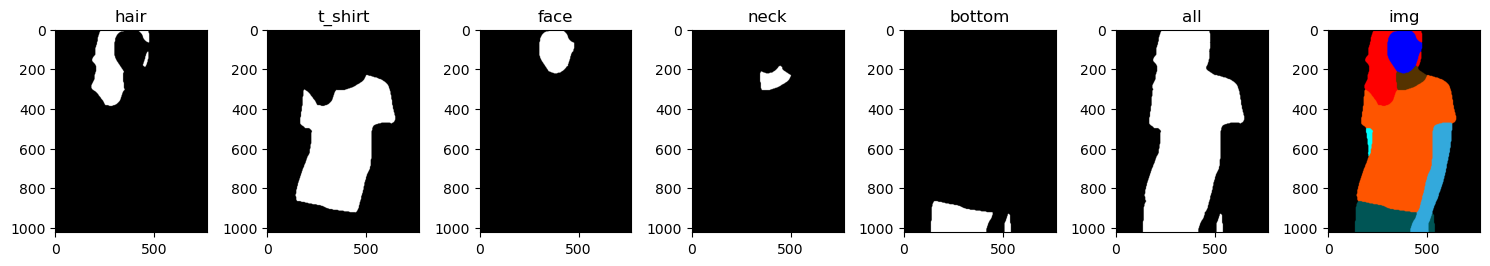

In [17]:
fig, ax = plt.subplots(1, 7, figsize=(15, 5))
ax[0].imshow(hair, cmap='gray')
ax[0].set_title('hair')
ax[1].imshow(t_shirt, cmap='gray')
ax[1].set_title('t_shirt')
ax[2].imshow(face, cmap='gray')
ax[2].set_title('face')
ax[3].imshow(neck, cmap='gray')
ax[3].set_title('neck')
ax[4].imshow(bottom, cmap='gray')
ax[4].set_title('bottom')
ax[5].imshow(all, cmap='gray')
ax[5].set_title('all')
ax[6].imshow(img)
ax[6].set_title('img')
fig.tight_layout()